In [284]:
#libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [285]:
#loading
df=pd.read_csv('Sales_Data_Practical.csv')
df.head(10)

,Date,Product,Category,Region,Sales,Discount,Profit,Quantity,Customer ID,Customer Name
0,01/01/2023 00:00,Laptop,Electronics,South,7088.70,-18.41,12812.20609,24,baa8b7ef,Andrew Allen
1,02/01/2023 00:00,Smartphone,Electronics,North,177.05,10.42,158.60000,2,baa8b7ef,Nancy Roberson
2,03/01/2023 00:00,Monitor,Electronics,East,117.18,12.33,102.73000,2,bc22c376,Heather Odonnell
3,04/01/2023 00:00,Laptop,Electronics,south,262.82,3.13,254.59000,3,c9ecc47e,Allen Martinez
4,05/01/2023 00:00,Tablet,Electronics,West,257.20,0.87,254.96000,3,db37a4eb,Amy Bray
5,06/01/2023 00:00,Monitor,Electronics,South,99.22,2.22,97.02000,1,db60bbd2,Misty Taylor
6,07/01/2023 00:00,Monitor,Electronics,North,171.87,11.97,151.30000,3,1141477b,Thomas Henderson
7,01/08/2023,Tablet,Electronics,North,169.92,1.90,166.69000,6,NaN,Dr. Tracy Michael
8,09/01/2023 00:00,Tablet,Electronics,South,281.97,7.52,260.77000,24,74c9739b,Timothy Mason
9,10/01/2023 00:00,Monitor,Electronics,West,195.04,11.00,173.59000,6,9fd35063,Sandra Murray


In [286]:
df.columns

Index(['Date', 'Product', 'Category', 'Region', 'Sales', 'Discount', 'Profit',
       'Quantity', 'Customer ID', 'Customer Name'],
      dtype='object')

In [287]:
#quick overview of data
df.describe()

,Sales,Discount,Profit,Quantity
count,100.000000,100.000000,100.000000,100.000000
mean,707.597200,8.194900,830.043404,6.380000
std,1593.538362,7.765272,2168.615820,5.398803
min,78.300000,-18.410000,66.450000,1.000000
25%,171.952500,3.197500,156.145000,3.000000
50%,208.810000,9.590000,189.130000,5.000000
75%,250.862500,14.627500,230.307500,8.000000
max,7516.200000,19.850000,12812.206090,27.000000


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           100 non-null    object 
 1   Product        100 non-null    object 
 2   Category       100 non-null    object 
 3   Region         100 non-null    object 
 4   Sales          100 non-null    float64
 5   Discount       100 non-null    float64
 6   Profit         100 non-null    float64
 7   Quantity       100 non-null    int64  
 8   Customer ID    86 non-null     object 
 9   Customer Name  100 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.9+ KB


In [289]:
#pre-processing
df.isna().sum() #checking for missing values

Date              0
Product           0
Category          0
Region            0
Sales             0
Discount          0
Profit            0
Quantity          0
Customer ID      14
Customer Name     0
dtype: int64

In [290]:
df.dropna(inplace=True) #dropping missing values
df.isna().sum() 

Date             0
Product          0
Category         0
Region           0
Sales            0
Discount         0
Profit           0
Quantity         0
Customer ID      0
Customer Name    0
dtype: int64

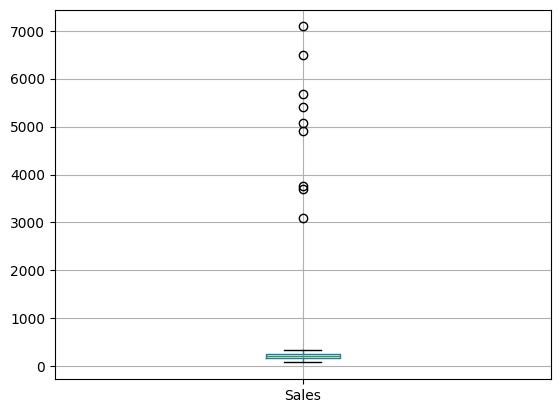

In [291]:
#boxplot
df.boxplot(column='Sales')
plt.show()

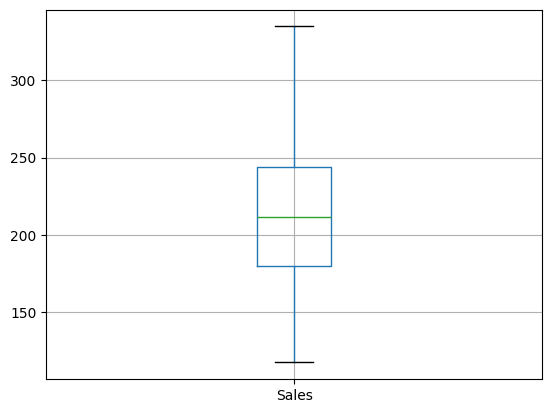

In [292]:
#filter all values after 1000 to remove outliers
df =df[ df['Sales']< 1000]
df=df[df['Sales']>100]


df.boxplot(column='Sales')
plt.show()

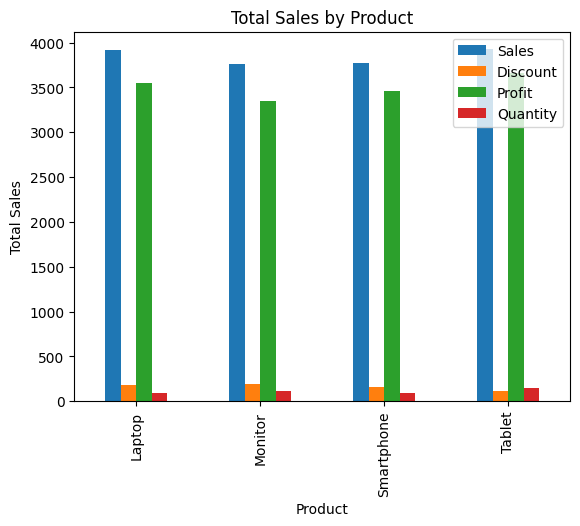

In [293]:
#visualisation
# total_sales_by_product= df.groupby('Product').sum()['Sales']
total_sales_by_product= df.groupby('Product').sum()
total_sales_by_product.plot(kind='bar')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

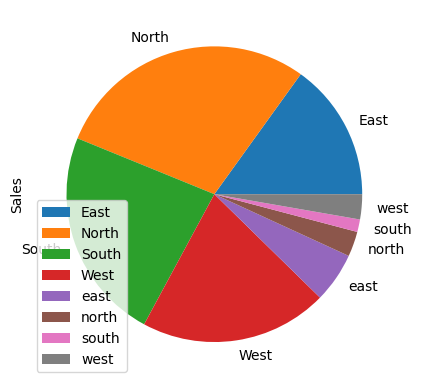

In [294]:
total_number_of_sales_by_region=df.groupby('Region').count()
total_number_of_sales_by_region.plot(kind='pie',y='Sales')
plt.show()

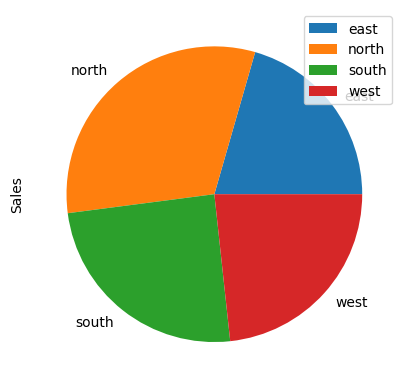

In [295]:
#lowercase column
df['Region']=df['Region'].str.lower()
total_number_of_sales_by_region=df.groupby('Region').count()
total_number_of_sales_by_region.plot(kind='pie',y='Sales')
plt.show()

In [296]:
df['Date']=df['Date'].astype('datetime64')
df.head(10)

,Date,Product,Category,Region,Sales,Discount,Profit,Quantity,Customer ID,Customer Name
1,2023-02-01,Smartphone,Electronics,north,177.05,10.42,158.60,2,baa8b7ef,Nancy Roberson
2,2023-03-01,Monitor,Electronics,east,117.18,12.33,102.73,2,bc22c376,Heather Odonnell
3,2023-04-01,Laptop,Electronics,south,262.82,3.13,254.59,3,c9ecc47e,Allen Martinez
4,2023-05-01,Tablet,Electronics,west,257.20,0.87,254.96,3,db37a4eb,Amy Bray
6,2023-07-01,Monitor,Electronics,north,171.87,11.97,151.30,3,1141477b,Thomas Henderson
8,2023-09-01,Tablet,Electronics,south,281.97,7.52,260.77,24,74c9739b,Timothy Mason
9,2023-10-01,Monitor,Electronics,west,195.04,11.00,173.59,6,9fd35063,Sandra Murray
11,2023-01-12,Smartphone,Electronics,west,244.11,3.27,236.13,4,559124f2,Tyler Hawkins
12,2023-01-13,Smartphone,Electronics,north,138.46,5.48,130.87,3,9ae436b3,Jessica Sanchez
13,2023-01-14,Smartphone,Electronics,south,186.98,18.57,152.26,4,9ae436b3,Vanessa Norton


In [297]:
#encode categorical variable product
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Product']=labelencoder.fit_transform(df['Product'])

region_encoder=LabelEncoder()
df['Region']=region_encoder.fit_transform(df['Region'])

df.head(10)

,Date,Product,Category,Region,Sales,Discount,Profit,Quantity,Customer ID,Customer Name
1,2023-02-01,2,Electronics,1,177.05,10.42,158.60,2,baa8b7ef,Nancy Roberson
2,2023-03-01,1,Electronics,0,117.18,12.33,102.73,2,bc22c376,Heather Odonnell
3,2023-04-01,0,Electronics,2,262.82,3.13,254.59,3,c9ecc47e,Allen Martinez
4,2023-05-01,3,Electronics,3,257.20,0.87,254.96,3,db37a4eb,Amy Bray
6,2023-07-01,1,Electronics,1,171.87,11.97,151.30,3,1141477b,Thomas Henderson
8,2023-09-01,3,Electronics,2,281.97,7.52,260.77,24,74c9739b,Timothy Mason
9,2023-10-01,1,Electronics,3,195.04,11.00,173.59,6,9fd35063,Sandra Murray
11,2023-01-12,2,Electronics,3,244.11,3.27,236.13,4,559124f2,Tyler Hawkins
12,2023-01-13,2,Electronics,1,138.46,5.48,130.87,3,9ae436b3,Jessica Sanchez
13,2023-01-14,2,Electronics,2,186.98,18.57,152.26,4,9ae436b3,Vanessa Norton


In [298]:
#train machine learning model
X=df[['Product','Region','Sales','Quantity','Discount']]
y=df['Profit']

In [299]:
X

,Product,Region,Sales,Quantity,Discount
1,2,1,177.05,2,10.42
2,1,0,117.18,2,12.33
3,0,2,262.82,3,3.13
4,3,3,257.20,3,0.87
6,1,1,171.87,3,11.97
...,...,...,...,...,...
94,2,1,184.57,4,17.49
95,2,0,234.35,8,10.20
96,0,2,196.35,21,14.47
97,2,1,146.65,5,2.08


In [300]:
y

1     158.60
2     102.73
3     254.59
4     254.96
6     151.30
       ...  
94    152.29
95    210.45
96    167.94
97    143.60
99    128.26
Name: Profit, Length: 73, dtype: float64

In [301]:
#splitting data
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=0)

In [302]:
model=LinearRegression()
model.fit(train_X,train_y)

#assess model
#test machine learning model
#mean squared error
from sklearn.metrics import mean_squared_error
y_pred=model.predict(test_X)
mse=mean_squared_error(test_y,y_pred)
print(mse)  

#model score
score=model.score(test_X,test_y)
print(score*100)

12.314679784139411
99.31435074205733


In [304]:
#make a prediction
prediction=model.predict([[2,1,200,2,100]])
prediction

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-8.38139407])